In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import statistics
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from scipy import linalg
from sklearn.decomposition import FastICA, PCA
from mpl_toolkits.mplot3d import Axes3D
#from sklearn.metrics.plot_confusion_matrix import plot_confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


import re
import os

In [2]:
datadir = '/home/jing/Phd_project/project_UCD_blca/blca_publication_OUTPUT/blca_publication_OUTPUT_svm'
os.chdir(datadir)

In [8]:
plot_dpd=pd.read_pickle('plot_lincs_sct_onc_inv.pkl')


In [9]:
plot_dpd

,DPD_inv,DPD_onc
CellID,,
GSM5288672_AAACCCACAGCTATTG-1,-0.739227,-1.047376
GSM5288672_AAACCCATCTTCCGTG-1,-0.626704,-1.808790
GSM5288672_AAACGAAAGCGTCTCG-1,-1.067813,-1.779915
GSM5288672_AAAGAACCACTCTAGA-1,-1.249349,-1.725649
GSM5288672_AAAGGGCCACCAATTG-1,-0.797463,-1.867342
...,...,...
GSM5288671_TTTGTTGCACGACGAA-1,0.783676,0.134859
GSM5288671_TTTGTTGGTGAGACCA-1,1.388197,3.242619
GSM5288671_TTTGTTGGTGGTCTAT-1,0.458433,0.278866


In [10]:
plot_dpd['Sample'] = plot_dpd.index.str.split('_').str[0]


In [26]:
plot_dpd.loc[plot_dpd['Sample'].str.contains('GSM5288668|GSM5288669', case=False), 'Type'] = 'NMIBC'
plot_dpd.loc[plot_dpd['Sample'].str.contains('GSM5288670|GSM5288671', case=False), 'Type'] = 'MIBC'
plot_dpd.loc[plot_dpd['Sample'].str.contains('GSM5288672|GSM5288674', case=False), 'Type'] = 'Healthy'


In [27]:
display(plot_dpd)

,DPD_inv,DPD_onc,Sample,Type
CellID,,,,
GSM5288672_AAACCCACAGCTATTG-1,-0.739227,-1.047376,GSM5288672,Healthy
GSM5288672_AAACCCATCTTCCGTG-1,-0.626704,-1.808790,GSM5288672,Healthy
GSM5288672_AAACGAAAGCGTCTCG-1,-1.067813,-1.779915,GSM5288672,Healthy
GSM5288672_AAAGAACCACTCTAGA-1,-1.249349,-1.725649,GSM5288672,Healthy
GSM5288672_AAAGGGCCACCAATTG-1,-0.797463,-1.867342,GSM5288672,Healthy
...,...,...,...,...
GSM5288671_TTTGTTGCACGACGAA-1,0.783676,0.134859,GSM5288671,MIBC
GSM5288671_TTTGTTGGTGAGACCA-1,1.388197,3.242619,GSM5288671,MIBC
GSM5288671_TTTGTTGGTGGTCTAT-1,0.458433,0.278866,GSM5288671,MIBC


In [28]:
import seaborn as sns

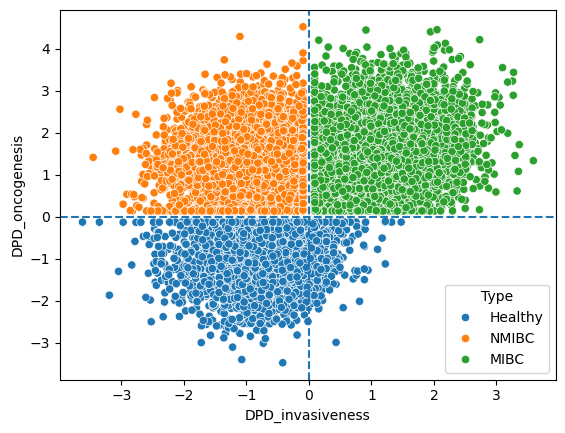

In [35]:

sns.scatterplot(plot_dpd,x='DPD_inv',y='DPD_onc',hue='Type')
plt.axvline(x=0,linestyle='--')
plt.axhline(y=0,linestyle='--')
plt.xlabel('DPD_invasiveness')
plt.ylabel('DPD_oncogenesis')

plt.savefig("DPD_sct_lincs_healthy_onc.png",dpi=300)

In [34]:
print(np.max(plot_dpd[plot_dpd['Type'] == 'Healthy']['DPD_onc']))

print(np.min(plot_dpd[plot_dpd['Type'] != 'Healthy']['DPD_onc']))
print(np.max(plot_dpd[plot_dpd['Type'] == 'NMIBC']['DPD_inv']))
print(np.min(plot_dpd[plot_dpd['Type'] == 'MIBC']['DPD_inv']))


#complete separation

-0.11354737396099635
0.12182227127374656
-0.08739346607060683
0.08849305319907774


### k fold

In [37]:
data_all_cells = pd.read_pickle('plot_lincs_sct_onc_inv.pkl')

In [39]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold, cross_val_score
clf = DecisionTreeClassifier(random_state=42)

k_folds = KFold(n_splits = 5)

scores = cross_val_score(clf, data_all_cells, plot_dpd['Type'], cv = k_folds)
print("Cross Validation Scores: ", np.round(scores,2))
print("Average CV Score: ", np.round(scores.mean(),2))



Cross Validation Scores:  [1. 1. 1. 1. 1.]
Average CV Score:  1.0
